
ExtraaLearn Project
Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

- The customer interacts with the marketing front on social media or other online platforms.
- The customer browses the website/app and downloads the brochure
- The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.
Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

Data Description

- The data contains the different attributes of leads and their interaction details with ExtraaLearn. - The detailed data dictionary is given below.

Data Dictionary

- ID: ID of the lead

- age: Age of the lead

- current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

- first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'

- profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)

- website_visits: How many times has a lead visited the website

- time_spent_on_website: Total time spent on the website

- page_views_per_visit: Average number of pages on the website viewed during the visits.

- last_activity: Last interaction between the lead and ExtraaLearn.
    Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    Website Activity: Interacted on live chat with representative, Updated profile on website, etc

- print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

- print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

- digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

- educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

- referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

- status: Flag indicating whether the lead was converted to a paid customer or not.



### Importing necessary librairies

In [20]:
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from google.auth.transport.requests import Request
import os.path
import pickle

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/drive.file']

def get_google_drive_service():
    creds = None
    # The file token.pickle stores the user's access and refresh tokens
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
            
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
            
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    # Return Google Drive API service
    return build('drive', 'v3', credentials=creds)

# Create Drive API service
service = get_google_drive_service()

ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import drive
drive.mount('content/drive')

In [ ]:
print("Current working directory:", os.getcwd())  # Let's first check where we are

Current working directory: /home/hounfodji/me/projects/potential_customers_prediction


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [21]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphical display  to display plots and figures directly in the notebook.
%matplotlib inline

# To build models for prediction
from sklearn.model_selection import train_test_split
from sklearn import tree

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### Import dataset

In [22]:
# read the data
data = pd.read_csv("ExtraaLearn.csv")
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [23]:
# copying data to another variable to avoid any changes to the original data
df = data.copy()

### Data Overview

In [24]:
# return the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [25]:
# view the last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [26]:
# Understand the shape of the data
df.shape

(4612, 15)

### Observations
    - The dataset has 4612 rows and 15 columns

### Checking the info

In [27]:
# Method to check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Observations
- age, website_visits, time_spent_on_website, page_views_per_visit and status are of numeric type and the rest of the columns are of object type. Will have to create dummy encoding for object columns of the model. 
- The number of non-null values is 4612, that is same as the total number of entries in the data, i.e., they are no null values.
- The column ID is an iidentifier for lead in the data. This column will not help with our analysis so we can drop it later.

In [28]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observations:
Data contains unique rows. There is no need to remove any rows.

### Exploratory Data Analysis (EDA)

### Summary Statistics

#### Numerical variables


In [29]:
# checking the descriptive statistics of the columns
numerical_col = df.select_dtypes('number').columns
df[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Observations
- age - Average age of the lead is 46 with the youngest being 18 and the oldest being 63. With 50% being around 51 years old.
- website_visits - Average number of visites is 3.5. There is a large gap between 75th percentile and max indicating there could be an outlier.
- time_spent_on_website - Time spent ranges from 0-2537s (0-42min).
- page_views_per_visit - Average page views is 3. There is a large gap between 75th percentile and max indicating there could be an outlier, or or a very pracousious lead.
- status - Over 75% of the leads are not likely to convert

#### Categorical variables

In [30]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes('object').columns)
cat_col

['ID',
 'current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [31]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print(round(100*df[column].value_counts()/len(df), 2))
    print('-' * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
ID
EXT001     0.02
EXT2884    0.02
EXT3080    0.02
EXT3079    0.02
EXT3078    0.02
           ... 
EXT1537    0.02
EXT1536    0.02
EXT1535    0.02
EXT1534    0.02
EXT4612    0.02
Name: count, Length: 4612, dtype: float64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
current_occupation
Professional    56.72
Unemployed      31.24
Student         12.03
Name: count, dtype: float64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
first_interaction
Website       55.12
Mobile App    44.88
Name: count, dtype: float64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low

#### Observations 
- Most of the leads are working professionals that is 2616.
- The majority 55,12% of the leads interacted with ExtraaLearn from the website.
- Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48/59% respectively. Only 2.3% of the profile completions are categorized as low.
- Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email. * It is observable that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [32]:
# checking the number of unique values
df["ID"].nunique()

4612

- As expected, all the values in the ID column are unique. We can drop this column as it would not add value to our analysis.

In [33]:
# dropping ID column
df.drop(["ID"], axis=1, inplace=True)

#### Univariable Analysis

#### Observation on Status



In [34]:
%matplotlib inline

Rectangle(xy=(0.6, 0), width=0.8, height=1377, angle=0)


<Figure size 1200x700 with 0 Axes>

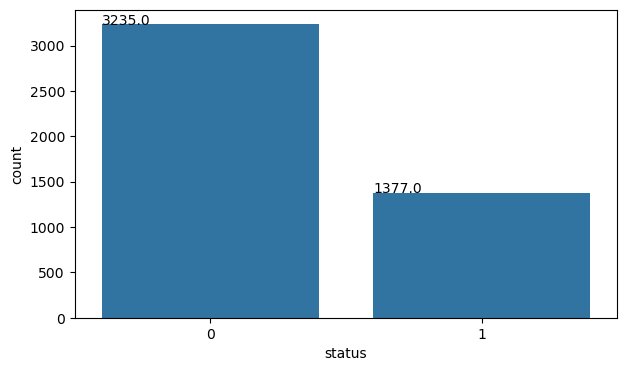

In [35]:
plt.figure(figsize=(7,4))

plots = sns.countplot(x = 'status', data=df)

# Annotating the exact count on the top of the bar for each category
for p in plots.patches:
    plots.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

print(p)
plt.show()

- The above plot shows that number of leads converted are significantly less than number of leads not converted.
- The plot indicates that ~30% (1377/4612) of leads have been converted.

### Distribution and ouliers for numerical columns in the data


age
Skew : -0.72


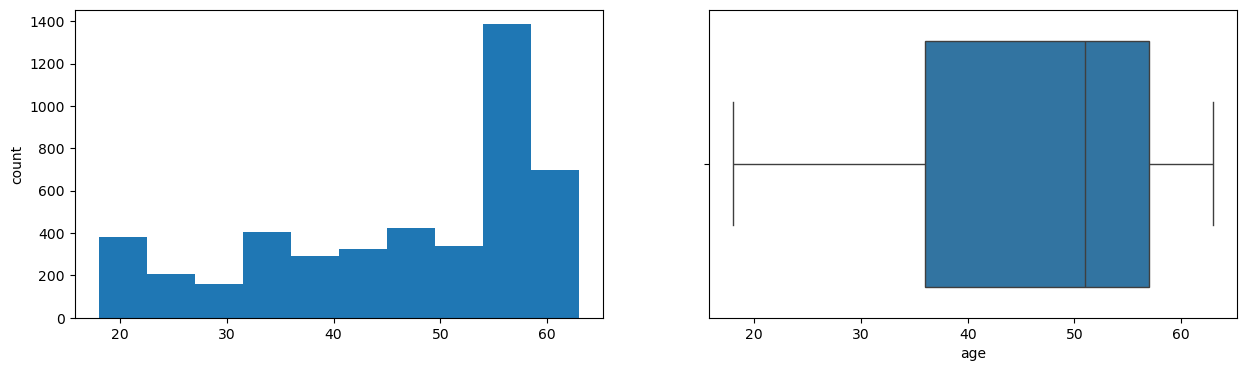

website_visits
Skew : 2.16


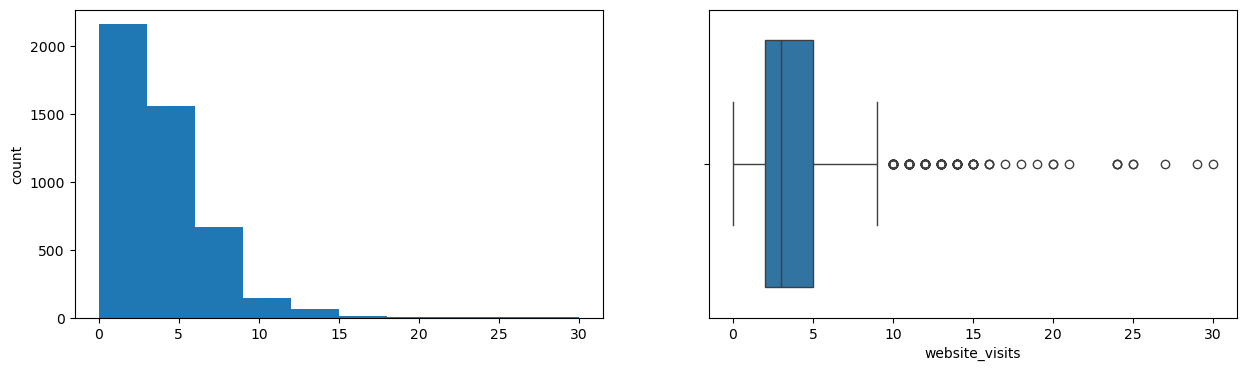

time_spent_on_website
Skew : 0.95


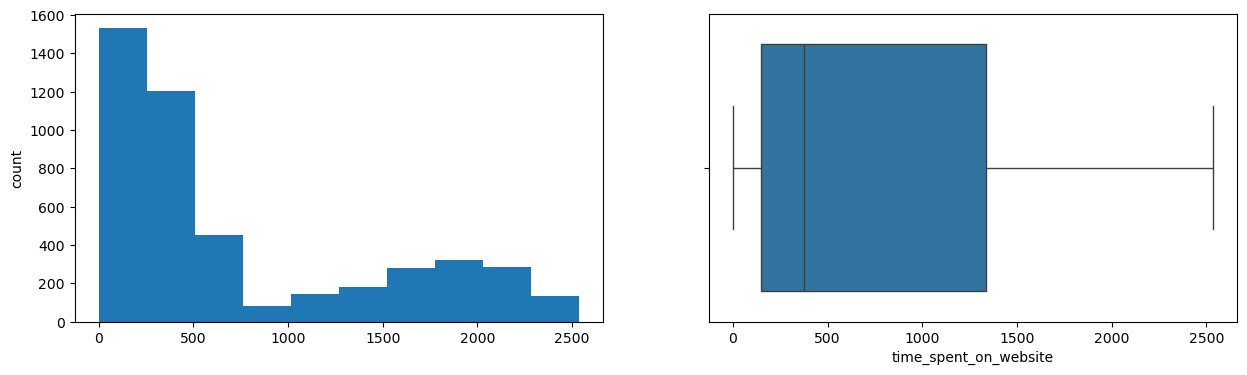

page_views_per_visit
Skew : 1.27


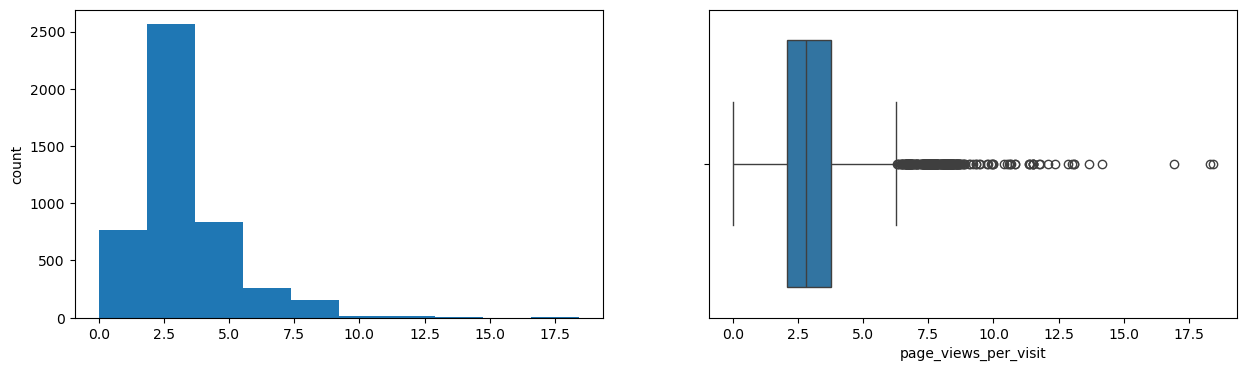

In [36]:
for feature in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(feature)
    
    print('Skew :', round(df[feature].skew(), 2))
    
    plt.figure(figsize= (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[feature].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df[feature])
    
    plt.show()

#### Observations

- age - The age of leads are left skewed with most falling between the ages of 55-60. There are a uniform number of leads from 20-55 years old.
- website_visits - Website visits are heavily right skewed with many leads never having visited the website. There are a number of outliers past the 75th percentile of 7.5 website visits.
- time_spent_on_website - Time spent on the web site is right skewed with many leads spending no time on the website. There seemes to be a second small normal distribution of leads centered around 1750s. Perhaps indicating there are 2 groups of leads, one that spends little or no time on the website, and a second that uses the website as a primary source of information.
- page_views_per_visit - Page views is right skewed with a majority of leads viewing 2-4 pages of the website. There are a number of outliers pass the 75th percentile.

### Distribution of categorical data


current_occupation


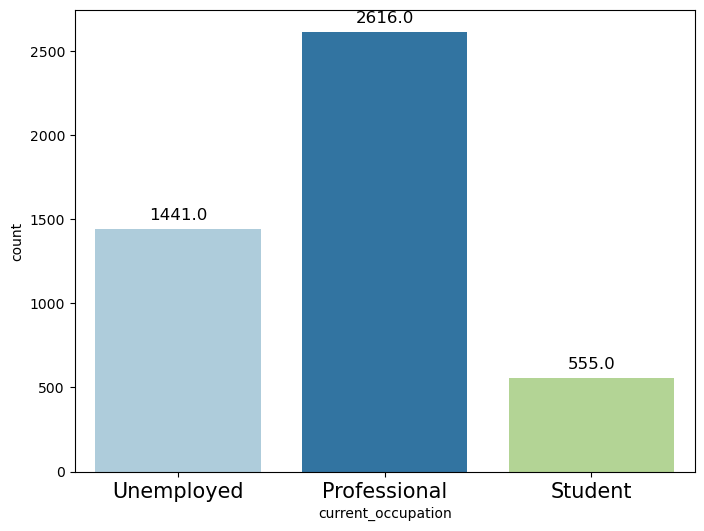

first_interaction


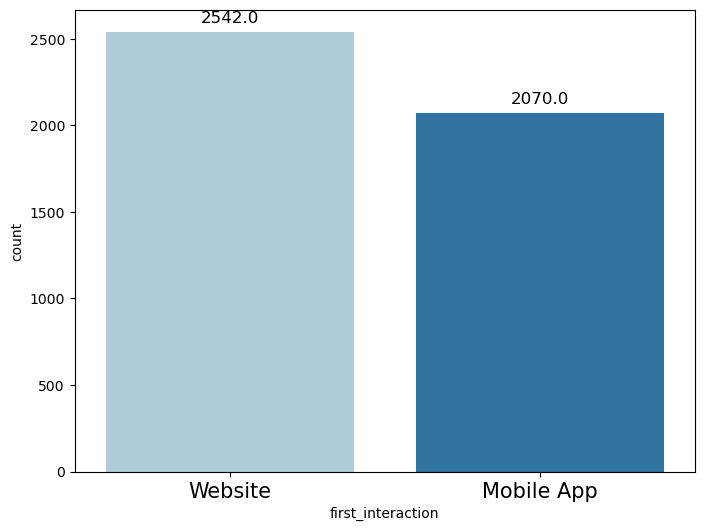

profile_completed


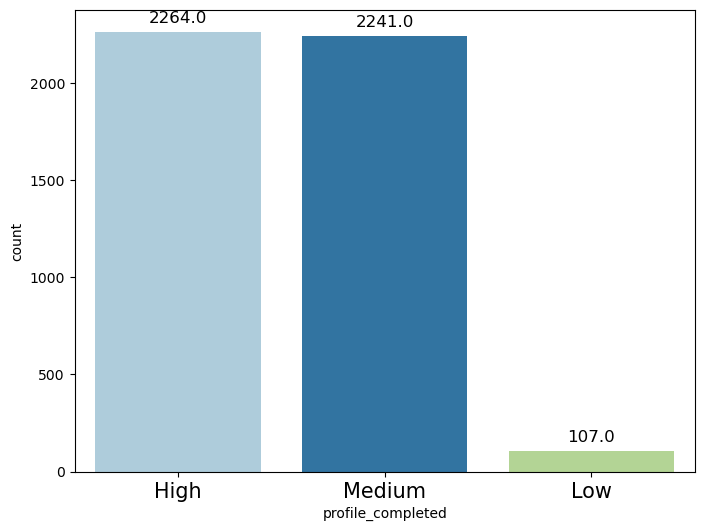

last_activity


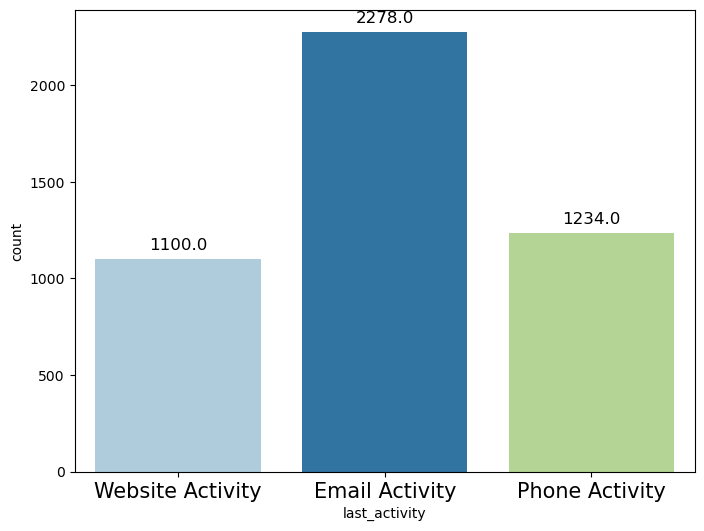

print_media_type1


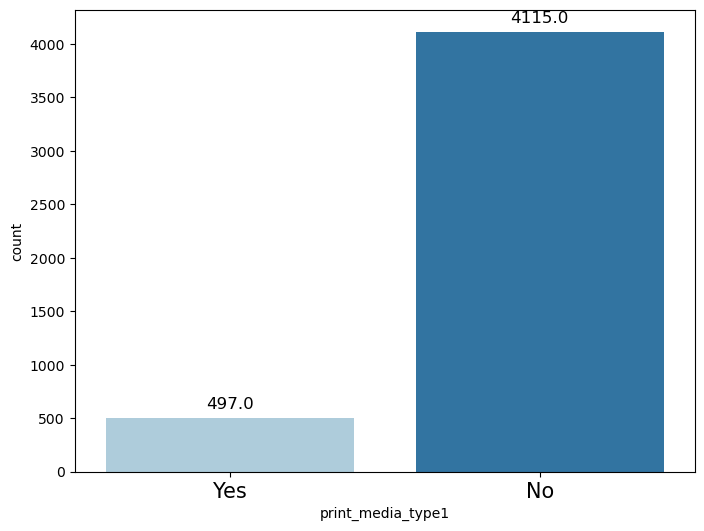

print_media_type2


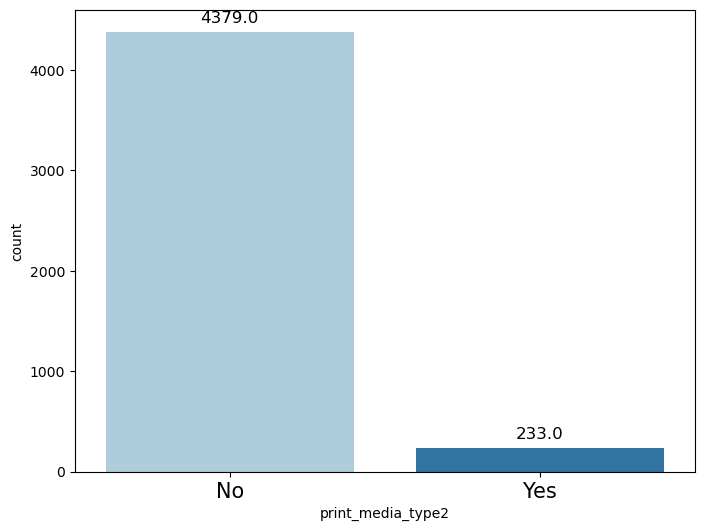

digital_media


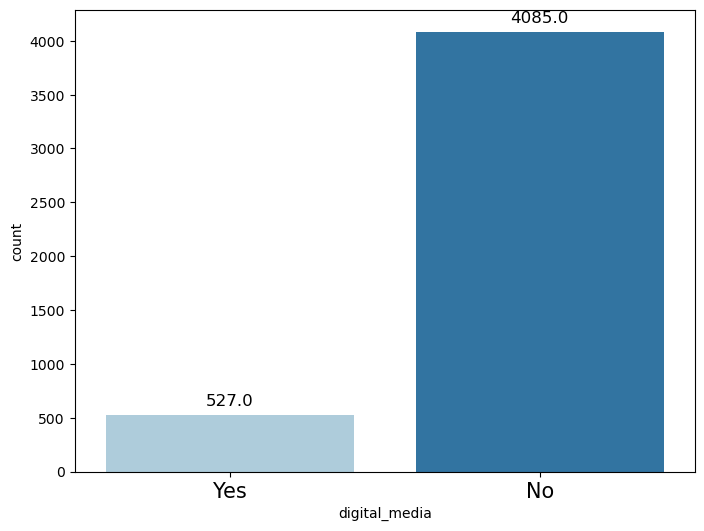

educational_channels


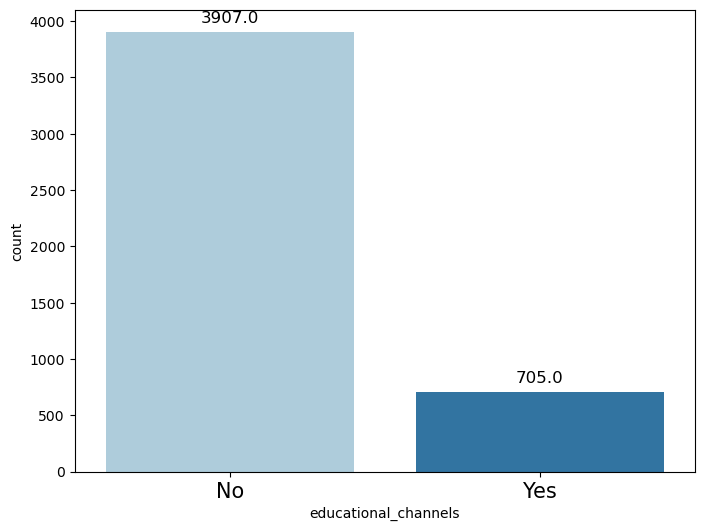

referral


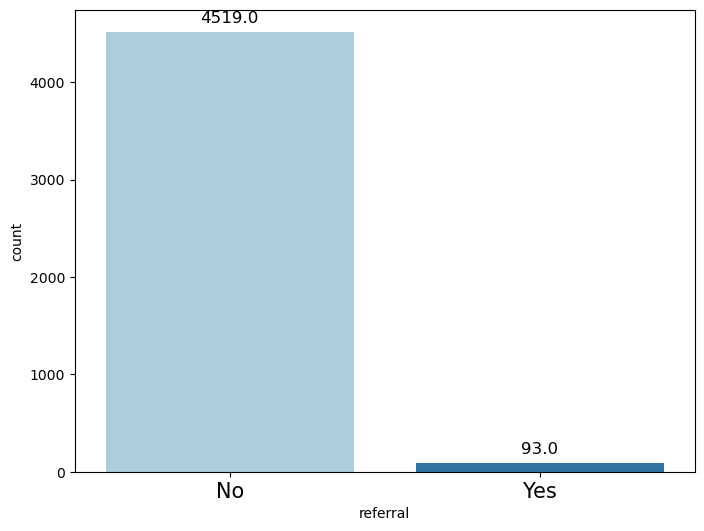

In [37]:
for feature in ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']:
    print(feature)
    
    plt.figure(figsize=(8,6))
    total = len(data[feature]) # length of the column
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        
    )
    
    for p in ax.patches:
        
        label = p.get_height() # count of each level of category
        
        x = p.get_x() + p.get_width() / 2 # width of the plot
        y = p.get_height() # height of the plot
        
        ax.annotate(
            label,
            (x,y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 10),
            textcoords="offset points",
        ) # annotate the percentage
    
    plt.xticks(rotation=0)
    plt.show() # show the plot

##### Observations:
- 2616 leads are working professional.
- First interraction media is website.
- Most of the lead's first interraction was through website, whereas last activity was with mobile app.
- Maximum leads completed their profile highly and medium level.

#### Bivariate Analysis

##### Correlation heatmap

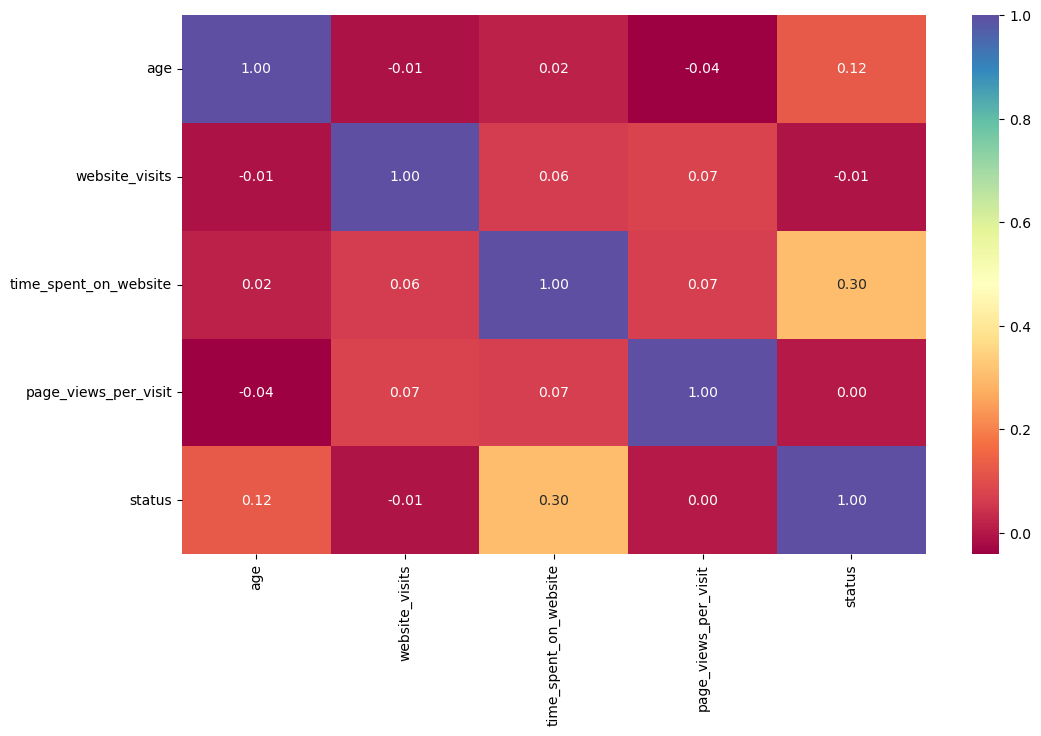

In [41]:
variables = df[numerical_col]



plt.figure(figsize=(12,7))

sns.heatmap(variables.corr(), annot=True, fmt='.2f', cmap="Spectral")

plt.show()

##### Observation
- The highest correlation shown between time spent on website with status.
- Slightly positive correlation with age as well
- There are weakly (negative) correlation between website visits and page view per visit with status, perhaps indicating that those who spend a long time on the website are very interested to convert, whereas those who have repeat visits are uncertain
- Most other data seems to have a fairly neutral correlations.

##### Let's check categorical variables might be more important for the prediction

Creating functions that will help us with further analysis.

In [43]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    
    data: dataframe
    predictor: independant variable
    target: target variable
    """
    
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

##### Let's first start by checking the current occupation impact on status

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


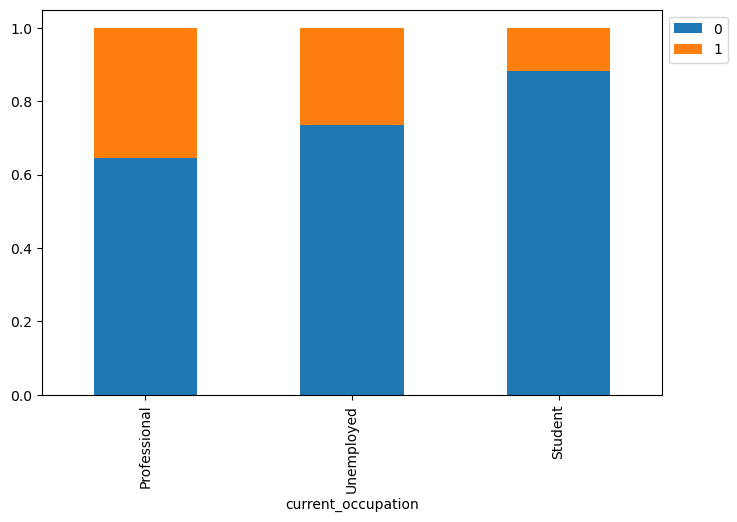

In [44]:
stacked_barplot(df, "current_occupation", "status")

**Observations**
- The barplot shows that students are least likely to be converted.
- Program might be more suitable for working professionals or currently unemployed leads.
- Professional are more interested in being converted rather than other two occupations, they want to learn more skills and are conscious about their career goals.

**Age can be a good factor to differentiate between such leads**

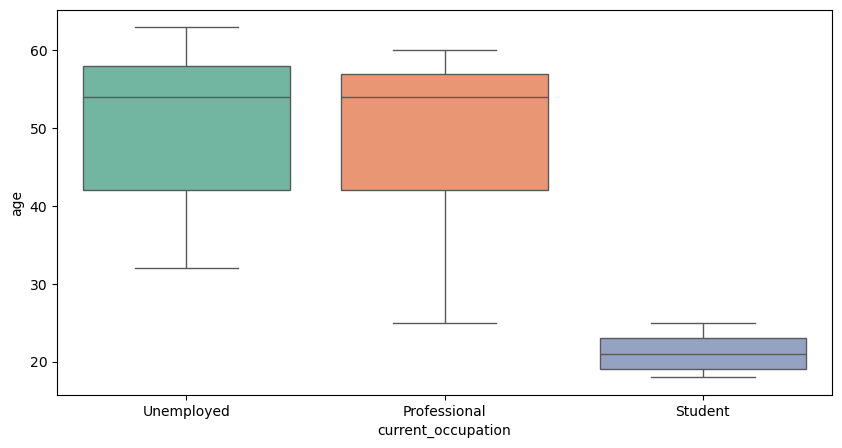

In [50]:
plt.figure(figsize=(10, 5))

sns.boxplot(x="current_occupation", y="age", data=df, palette="Set2")

plt.show()

In [51]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations**
- Professionnals age between 25 to 60 years
- Students are within 10 to 25 years age
- Age range of unemployed leads is 32 to 63 years
- The average age of working professionals and unemployed leads is almost 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's observe if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


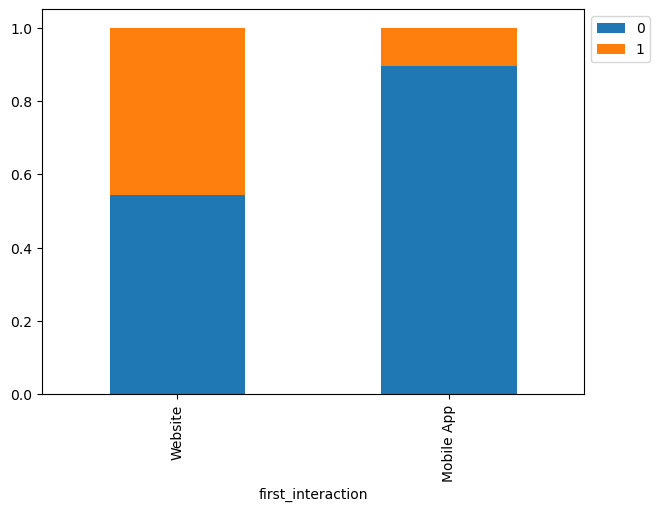

In [52]:
stacked_barplot(df, "first_interaction", "status") # stacked_barplot for first_interaction and status

**Observation**
- Highest number of leads have been converted to paid customers who first interact with Website rather than who interact with mobile app

**Let's look at the distribution of time spent on the website**

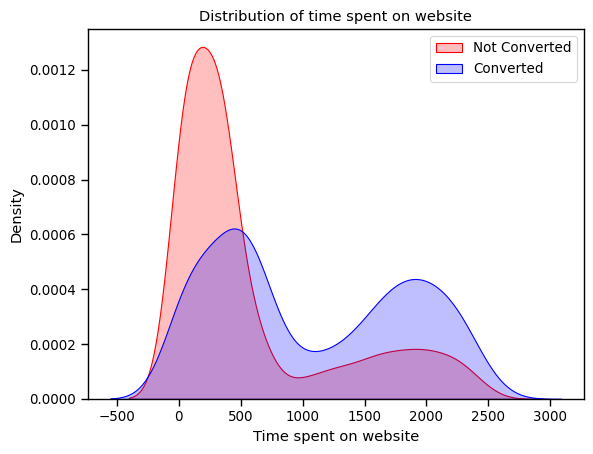

In [58]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(df.time_spent_on_website[(df["status"] == 0)], color="Red", shade=True)
ax = sns.kdeplot(df.time_spent_on_website[(df["status"] == 1)],
                 ax = ax, color="Blue", shade=True)
ax.legend(["Not Converted", "Converted"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Time spent on website')
ax.set_title('Distribution of time spent on website')

plt.show()

**Observations**
- Those leads spend more time on website are also more likely to converted to paid customer
  
**Let's do similar analysis for page views per visit**

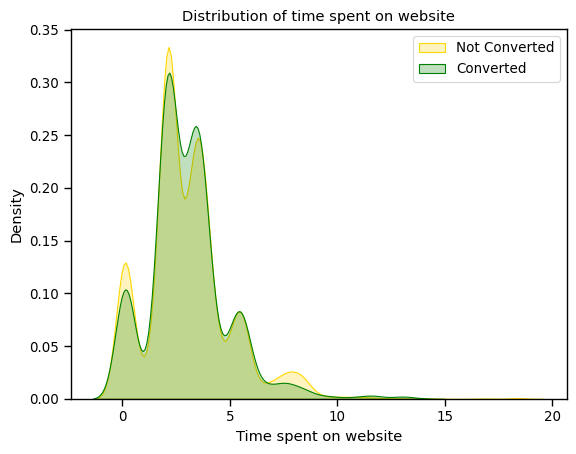

In [59]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(df.page_views_per_visit[(df["status"] == 0)], color="Gold", shade=True)
ax = sns.kdeplot(df.page_views_per_visit[(df["status"] == 1)],
                 ax = ax, color="Green", shade=True)
ax.legend(["Not Converted", "Converted"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Time spent on website')
ax.set_title('Distribution of time spent on website')

plt.show()

**Observations**: There is no major impact of the number of page view on status.

**Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


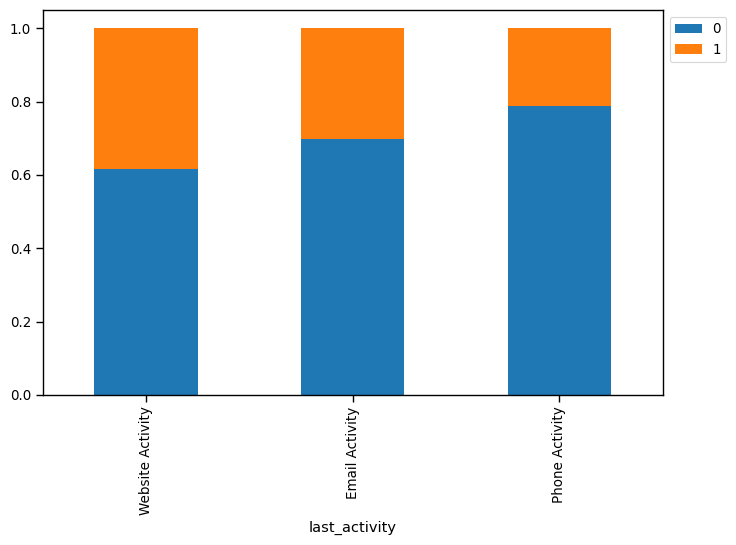

In [60]:
stacked_barplot(df, "last_activity", "status") # plot stacked_barplot for last_activity and status

**Observations:**

- Leads who are active on website hace higher rate of conversion.
- Those are active through email have median rate of conversion
- Very few conversion rate of leads who are using phone.

**The company gets leads from various channels such as print media (News paper and Magazine), digital media, refferals, etc. Let's check how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


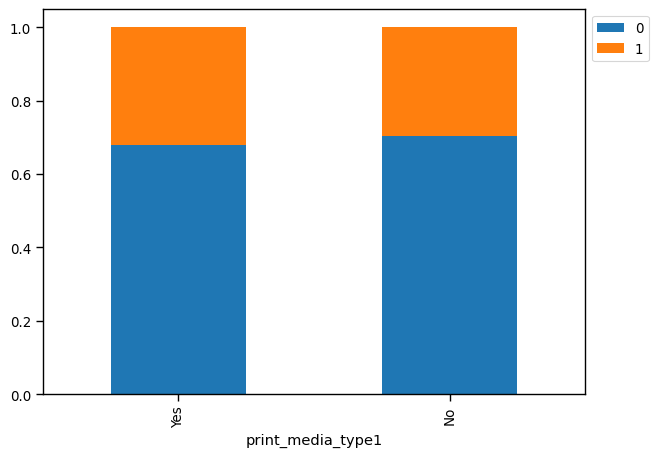

In [61]:
# code to plot stacked_barplot for print_media_type1 and status
stacked_barplot(df, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


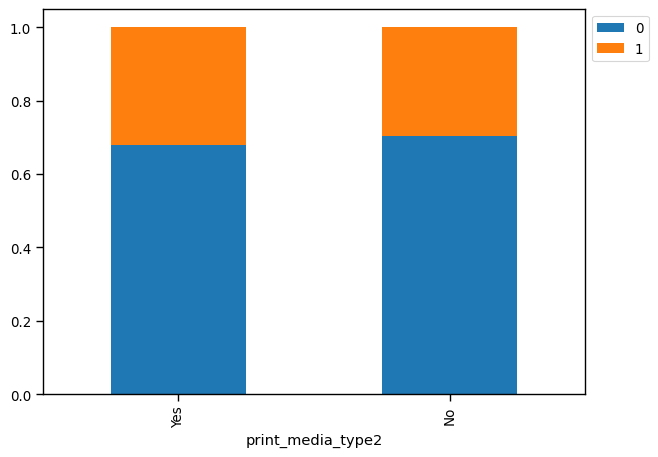

In [62]:
# code to plot stacked_barplot for print_media_type1 and status
stacked_barplot(df, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


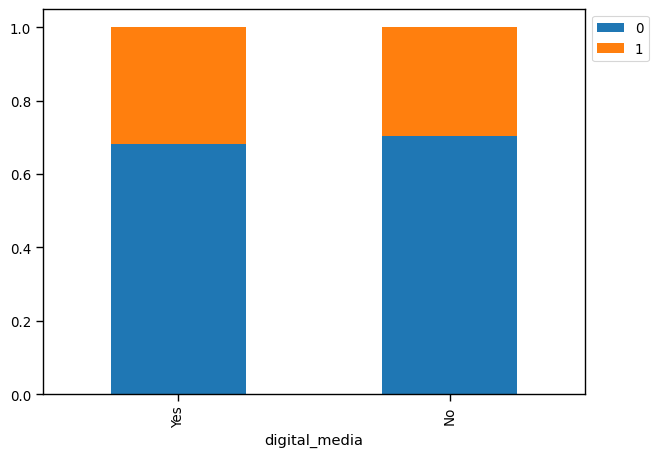

In [63]:
# code to plot stacked_barplot for print_media_type1 and status
stacked_barplot(df, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


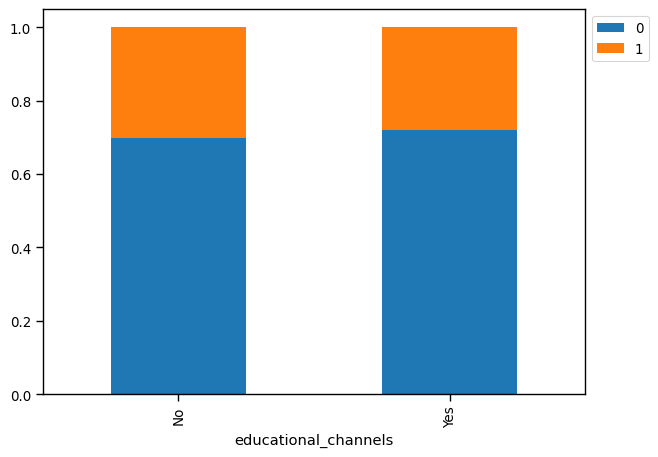

In [64]:
# code to plot stacked_barplot for print_media_type1 and status
stacked_barplot(df, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


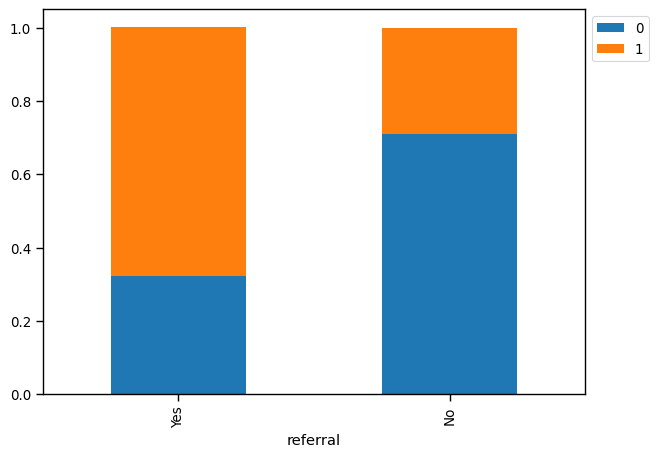

In [65]:
# code to plot stacked_barplot for print_media_type1 and status
stacked_barplot(df, "referral", "status")

**Observations**
- Leads who had seen the ad of ExtraaLearn in the Newspaper, Magazine, digital media and eeducational_channels have no such difference on convertion or not.
- But the leads had heard about ExtraaLearn through reference have highest rate of conversion to paid customer.

**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile conversion has an impact on lead conversion**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


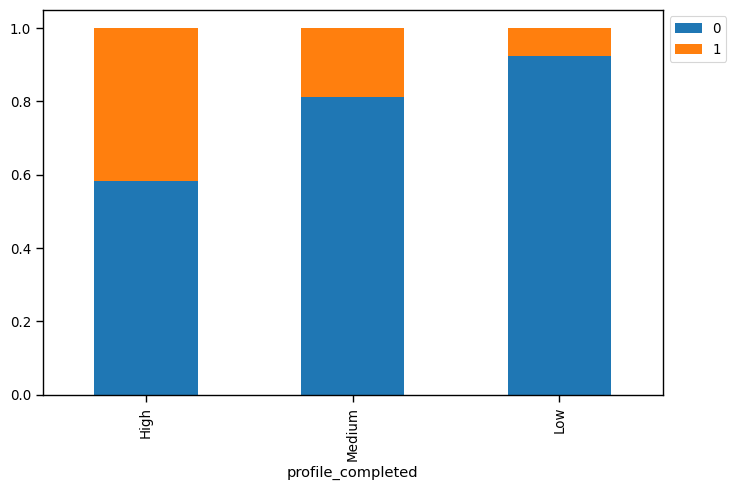

In [66]:
stacked_barplot(df, "profile_completed", "status") # plot stacked_barplot for profile_completed and status

**Observations:**

- Highest number of leads completed their profile converted to paid customer.
- The medium and low levels of profile completion observed comparatively very less conversions.
  
## Data Processing

### Outlier Detection

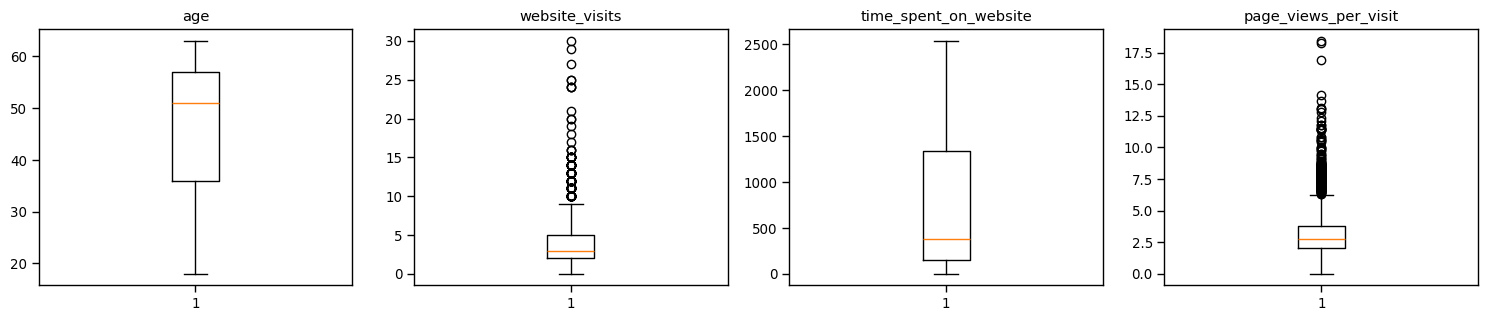

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping status as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in (enumerate(numeric_columns)):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

**Observations:**

- From the above plots, there are outliers showing in website_visit and page_views_per_visit plots.
- In website visit feature outlier points shows between 10 to 30 and in the page view per visit feature there are outliers in between 6 to 20.

### Data Preparation for modeling

- Before processed to build, first seperate the independant variables and dependant variables.
- Models cannot take non-numeric inputs. So, create dummy variables for all categorical variables
- Then split the data into train and tests sets.

In [68]:
# separating the target variable and independant variables
X = df.drop(columns='status') # make a copy called X which is a dataframe with "booking_status" removed

Y = df['status'] # Y is a series (column) containing the "booking_status"

In [69]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [70]:
# Check the data after handling categorical data
X

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,False,False,False,False,True,False,True,True,False,False,False,False


In [71]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

**Checking the shape of the train and test data**

In [72]:
print("Shape of the training set: ", X_train.shape)

print("Shape of the test set: ", X_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the text set: ")

print(y_test.value_counts(normalize=True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in the text set: 
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


### Building Classification Models

Created a function to avoid repetitive coding of classification report and confusion matrix for each model.

In [78]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize= (8, 5))
    
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### Decision Tree

**Building Decision Tree Model**

In [79]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=7)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

**Checking model performance on training set**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



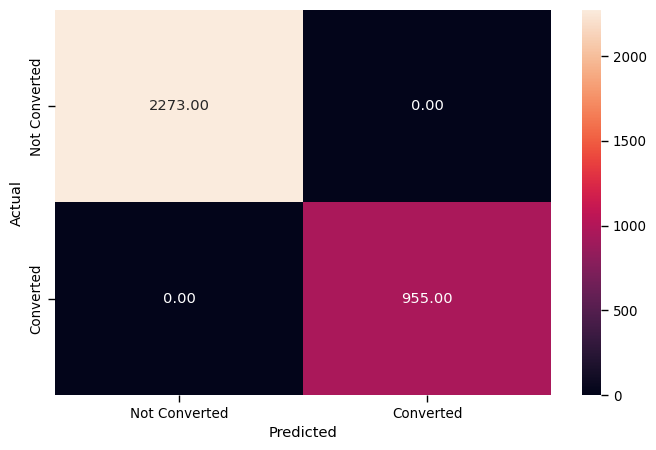

In [80]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**

- There is no error on the training set, i.e., each sample has been classified correctly. The model has performed very well on the training set.
- The model is perfectly fit on the training data, it is likely overfitted.

**Let's check the performance on test data to see if the model is overfitting**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



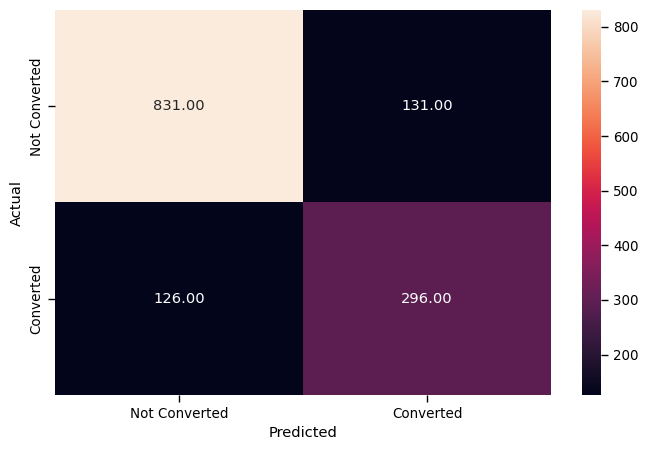

In [81]:
# Checking performance on test data to see if the model is overfitting

y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
- The decision tree model is overfitting the training data as expected and is not able to generalise well on the test set. It is overfitted
- The model is predicting equally on recall(70%) and precision(69%), i woulld like to prioritize increasing recall (minimizing false negatives).

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model.**

### Model Performance improvement

To set the class_weight hyperparameter with the value to 